# Imports

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from typing import List
import copy
import gc

import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

gc.enable()

# Config

In [2]:
k = 5
labels = ["cohesion", "syntax", "vocabulary", "phraseology", "grammar", "conventions"]

# Utilities

In [3]:
def select_k_nearest_labels_samples(
    data: pd.DataFrame, 
    external_data: pd.DataFrame, 
    labels_columns: List[str], 
    k: int = 5,
    output_path=None,
) -> pd.DataFrame:
    """
    Selects top k nearest label-wise samples for each instance/object in the given data
    """
    
    not_selected_external_data = copy.deepcopy(external_data)
    
    selected_indexes = []
    for index, sample in tqdm(data.iterrows(), total=len(data)):
        # stopping conditions
        if len(not_selected_external_data) == 0:
            break
        
        # labels
        sample_labels = sample[labels_columns].values
        not_selected_external_data_labels = not_selected_external_data[labels_columns].values
        
        # differences
        labels_difference = np.abs(not_selected_external_data_labels - sample_labels)
        labels_difference_mean = np.mean(labels_difference, axis=-1)
        
        # sorting and selecting k nearest samples
        sorted_difference_samples = np.argsort(labels_difference_mean, axis=0)
        selected_nearest_samples = sorted_difference_samples[:k]
        selected_nearest_samples = not_selected_external_data.iloc[selected_nearest_samples].index
        selected_indexes.extend(selected_nearest_samples)
        
        # removing selected samples from external data
        selected_indexes_mask = not_selected_external_data.index.isin(selected_indexes)
        not_selected_external_data = not_selected_external_data[~selected_indexes_mask]
    
    # selecting nearest samples    
    selected_external_data = external_data.iloc[selected_indexes]
    
    if output_path is not None:
        selected_external_data.to_csv(output_path)
        
    return selected_external_data

# Competition data

In [4]:
competition_data_path = "../input/feedback-prize-english-language-learning/train.csv"
competition_data = pd.read_csv(competition_data_path)

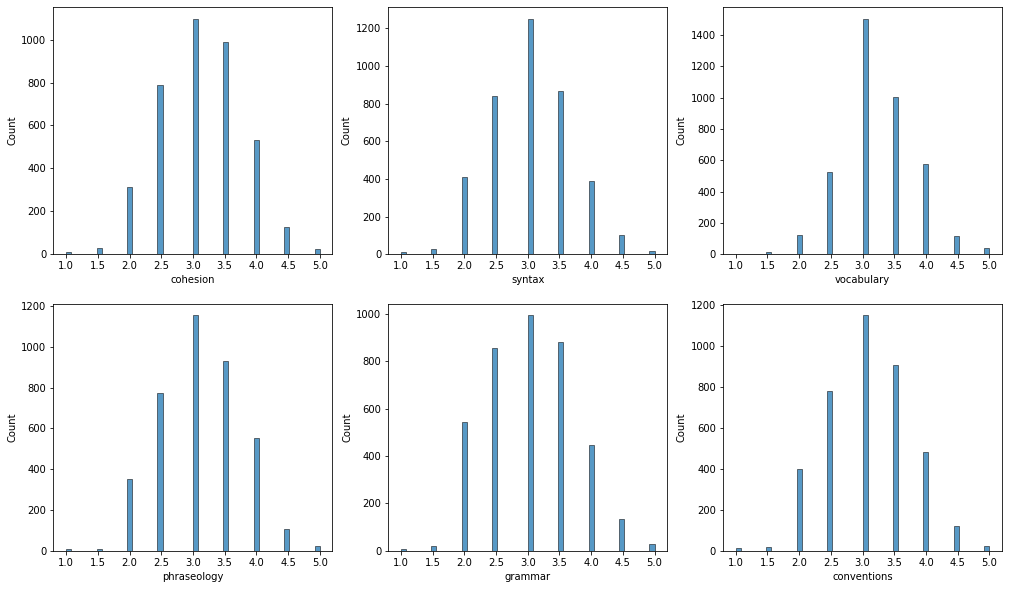

In [5]:
figure = plt.figure(figsize=(17, 10))
for index, label in enumerate(labels):
    ax = figure.add_subplot(2, 3, index+1)
    sns.histplot(x=label, data=competition_data, bins=50, ax=ax)

figure.show()
plt.show()

# Pseudo labels

In [6]:
pseudo_labels_fold1_path = "../input/pseudolabelsvadim/pseudo_labels_fold1.csv"
pseudo_labels_fold1 = pd.read_csv(pseudo_labels_fold1_path)
pseudo_labels_fold1["fold"] = 1

pseudo_labels_fold2_path = "../input/pseudolabelsvadim/pseudo_labels_fold2.csv"
pseudo_labels_fold2 = pd.read_csv(pseudo_labels_fold2_path)
pseudo_labels_fold2["fold"] = 2

pseudo_labels_fold3_path = "../input/pseudolabelsvadim/pseudo_labels_fold3.csv"
pseudo_labels_fold3 = pd.read_csv(pseudo_labels_fold3_path)
pseudo_labels_fold3["fold"] = 3

pseudo_labels_fold4_path = "../input/pseudolabelsvadim/pseudo_labels_fold4.csv"
pseudo_labels_fold4 = pd.read_csv(pseudo_labels_fold4_path)
pseudo_labels_fold4["fold"] = 4

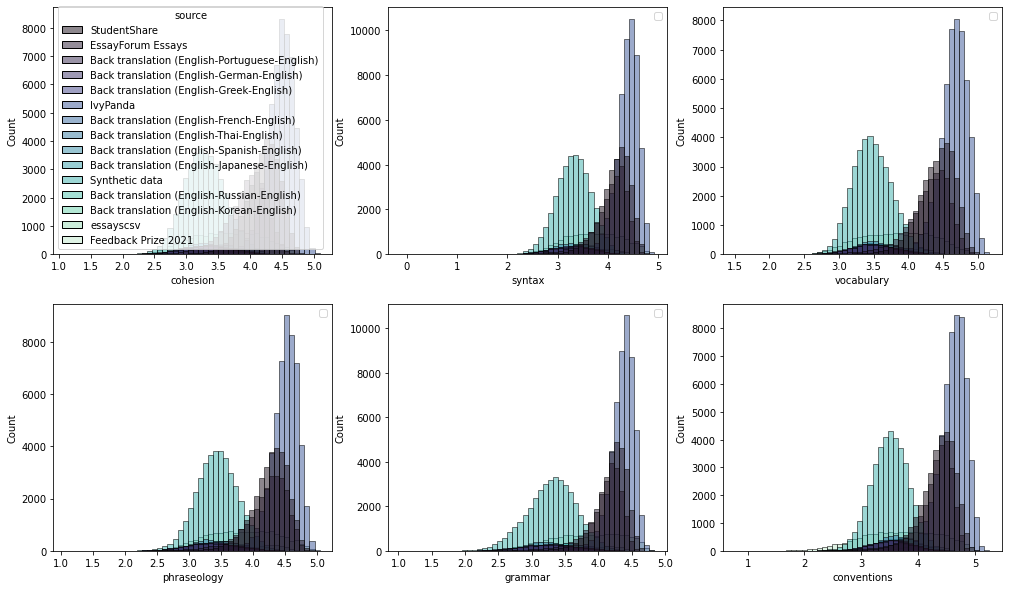

In [7]:
figure = plt.figure(figsize=(17, 10))
for index, label in enumerate(labels):
    ax = figure.add_subplot(2, 3, index+1)
    sns.histplot(x=label, data=pseudo_labels_fold1, hue="source", palette="mako",  bins=50, ax=ax)
    if index > 0:
        ax.legend([])
    
figure.show()
plt.show()

# k Nearest Labels selection

In [8]:
top_5_labels_nearests_pseudo_labels_fold1 = select_k_nearest_labels_samples(
    data=competition_data,
    external_data=pseudo_labels_fold1, 
    labels_columns=labels,
    output_path="top_5_labels_nearests_pseudo_labels_fold1.csv",
    k=k,
)

top_5_labels_nearests_pseudo_labels_fold2 = select_k_nearest_labels_samples(
    data=competition_data,
    external_data=pseudo_labels_fold2, 
    labels_columns=labels,
    output_path="top_5_labels_nearests_pseudo_labels_fold2.csv",
    k=k,
)

top_5_labels_nearests_pseudo_labels_fold3 = select_k_nearest_labels_samples(
    data=competition_data,
    external_data=pseudo_labels_fold3, 
    labels_columns=labels,
    output_path="top_5_labels_nearests_pseudo_labels_fold3.csv",
    k=k,
)

top_5_labels_nearests_pseudo_labels_fold4 = select_k_nearest_labels_samples(
    data=competition_data,
    external_data=pseudo_labels_fold4, 
    labels_columns=labels,
    output_path="top_5_labels_nearests_pseudo_labels_fold4.csv",
    k=k,
)

gc.collect()

100%|██████████| 3911/3911 [23:02<00:00,  2.83it/s]


1543

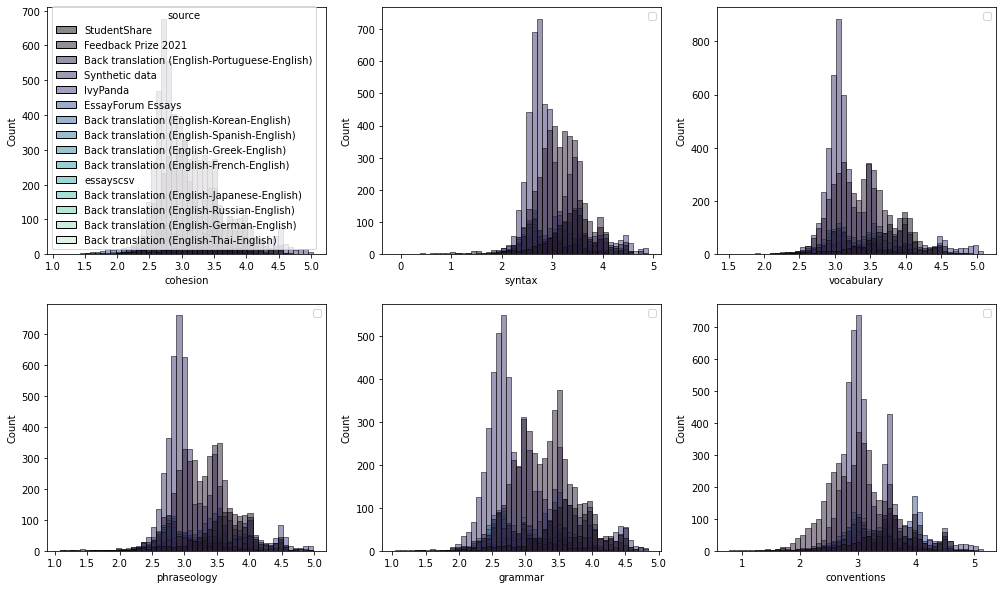

In [10]:
figure = plt.figure(figsize=(17, 10))
for index, label in enumerate(labels):
    ax = figure.add_subplot(2, 3, index+1)
    sns.histplot(x=label, data=top_5_labels_nearests_pseudo_labels_fold1, hue="source", palette="mako",  bins=50, ax=ax)
    
    if index > 0:
        ax.legend([])
    
figure.show()
plt.show()